In [37]:
import requests
import pandas as pd
from pymongo import MongoClient, UpdateOne
import json
import requests
import time
from config import api_key_zip, api_key_census
import matplotlib.pyplot as plt
import seaborn as sns


ModuleNotFoundError: No module named 'seaborn'

In [2]:
# Create a new database to hold copies of collections as to not interfere with data in the original collections
# MongoDB connection URI
mongo_uri = "mongodb://localhost:27017/"
mongo = MongoClient(mongo_uri)

# Connect to the original database
db = mongo.chicago_bikes

# Connect to the collections in the original database
start_stations_original = db['Top10StartStations']
end_stations_original = db['Top10EndStations']

# Connect to the new database
db2 = mongo["chicago_bikes_copy"]

# Specify the names of the new collections
new_start_collection_name = 'Top10StartStationsCopy'
new_end_collection_name = 'Top10EndStationsCopy'

# Drop existing collections with the same names in the new database (if needed)
db2[new_start_collection_name].drop()
db2[new_end_collection_name].drop()

# Create new collections in the new database
db2[new_start_collection_name].insert_many(start_stations_original.find())
db2[new_end_collection_name].insert_many(end_stations_original.find())

# Print each document in the new start stations collection to verify the data transfer
print(f"Documents in {new_start_collection_name}:")
for doc in db2[new_start_collection_name].find():
    print(doc)

# Print each document in the new end stations collection to verify the data transfer
print(f"\nDocuments in {new_end_collection_name}:")
for doc in db2[new_end_collection_name].find():
    print(doc)

Documents in Top10StartStationsCopy:
{'_id': 'Streeter Dr & Grand Ave', 'count': 71269, 'latitude': 41.880958, 'longitude': -87.616743}
{'_id': 'DuSable Lake Shore Dr & Monroe St', 'count': 39251, 'latitude': 41.867888, 'longitude': -87.623041}
{'_id': 'DuSable Lake Shore Dr & North Blvd', 'count': 37698, 'latitude': 41.897448, 'longitude': -87.628722}
{'_id': 'Michigan Ave & Oak St', 'count': 37208, 'latitude': 41.869265218438194, 'longitude': -87.67373085021973}
{'_id': 'Wells St & Concord Ln', 'count': 34508, 'latitude': 41.897448, 'longitude': -87.628722}
{'_id': 'Millennium Park', 'count': 32849, 'latitude': 41.8810317, 'longitude': -87.62408432}
{'_id': 'Clark St & Elm St', 'count': 32560, 'latitude': 41.920771, 'longitude': -87.663712}
{'_id': 'Kingsbury St & Kinzie St', 'count': 31614, 'latitude': 41.893992, 'longitude': -87.629318}
{'_id': 'Theater on the Lake', 'count': 31283, 'latitude': 41.926277, 'longitude': -87.630834}
{'_id': 'Wells St & Elm St', 'count': 28978, 'latitu

In [4]:
# Create a new database to hold the new collections
# MongoDB connection URI
mongo_uri = "mongodb://localhost:27017/"
mongo = MongoClient(mongo_uri)

# Create a new database
db2 = mongo["chicago_bikes_copy"]

# Add the collections to the database
Top10StartStationsCopy = db2["Top10StartStationsCopy"]
Top10EndStationsCopy = db2["Top10EndStationsCopy"]

In [5]:
# Pull in the data from Top10StartStations from original database
collection_name = 'Top10StartStationsCopy'
collection = db2[collection_name]
# The find() method without any parameters will return all documents in the collection
documents = collection.find()

# Print each document
for doc in documents:
    print(doc)

{'_id': 'Streeter Dr & Grand Ave', 'count': 71269, 'latitude': 41.880958, 'longitude': -87.616743}
{'_id': 'DuSable Lake Shore Dr & Monroe St', 'count': 39251, 'latitude': 41.867888, 'longitude': -87.623041}
{'_id': 'DuSable Lake Shore Dr & North Blvd', 'count': 37698, 'latitude': 41.897448, 'longitude': -87.628722}
{'_id': 'Michigan Ave & Oak St', 'count': 37208, 'latitude': 41.869265218438194, 'longitude': -87.67373085021973}
{'_id': 'Wells St & Concord Ln', 'count': 34508, 'latitude': 41.897448, 'longitude': -87.628722}
{'_id': 'Millennium Park', 'count': 32849, 'latitude': 41.8810317, 'longitude': -87.62408432}
{'_id': 'Clark St & Elm St', 'count': 32560, 'latitude': 41.920771, 'longitude': -87.663712}
{'_id': 'Kingsbury St & Kinzie St', 'count': 31614, 'latitude': 41.893992, 'longitude': -87.629318}
{'_id': 'Theater on the Lake', 'count': 31283, 'latitude': 41.926277, 'longitude': -87.630834}
{'_id': 'Wells St & Elm St', 'count': 28978, 'latitude': 41.893992, 'longitude': -87.6293

In [7]:
# Check to see that end stations was copied correctly
collection_name = 'Top10EndStationsCopy'
collection = db2[collection_name]
# The find() method without any parameters will return all documents in the collection
documents = collection.find()

# Print each document
for doc in documents:
    print(doc)

{'_id': 'Streeter Dr & Grand Ave', 'count': 72540, 'latitude': 41.892278, 'longitude': -87.612043}
{'_id': 'DuSable Lake Shore Dr & North Blvd', 'count': 40563, 'latitude': 41.911722, 'longitude': -87.626804}
{'_id': 'DuSable Lake Shore Dr & Monroe St', 'count': 38500, 'latitude': 41.880958, 'longitude': -87.616743}
{'_id': 'Michigan Ave & Oak St', 'count': 38279, 'latitude': 41.90096039, 'longitude': -87.62377664}
{'_id': 'Wells St & Concord Ln', 'count': 34688, 'latitude': 41.912133, 'longitude': -87.634656}
{'_id': 'Millennium Park', 'count': 33705, 'latitude': 41.8810317, 'longitude': -87.62408432}
{'_id': 'Clark St & Elm St', 'count': 32227, 'latitude': 41.902973, 'longitude': -87.63128}
{'_id': 'Theater on the Lake', 'count': 31672, 'latitude': 41.926277, 'longitude': -87.630834}
{'_id': 'Kingsbury St & Kinzie St', 'count': 30450, 'latitude': 41.88917683258, 'longitude': -87.6385057718}
{'_id': 'Wells St & Elm St', 'count': 28346, 'latitude': 41.903222, 'longitude': -87.634324}


In [18]:
# Find the zip code using the latitude and longitude for each station
# MongoDB setup
mongo_uri = "mongodb://localhost:27017/"
mongo = MongoClient(mongo_uri)
db2 = mongo["chicago_bikes_copy"]

# LocationIQ API setup
api_key_locationiq = api_key_zip

# Function to get zip code using LocationIQ
def get_zip_code(latitude, longitude, api_key):
    url = f"https://us1.locationiq.com/v1/reverse.php?key={api_key}&lat={latitude}&lon={longitude}&format=json"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data.get("address", {}).get("postcode")
    else:
        print(f"Error retrieving ZIP code for {latitude}, {longitude}: {response.text}")
        return None

# Function to update ZIP codes in MongoDB collection
def update_zip_codes(collection_name):
    collection = db2[collection_name]
    for station in collection.find():
        lat = station.get("latitude")
        lon = station.get("longitude")
        zip_code = get_zip_code(lat, lon, api_key_locationiq)
        if zip_code:
            collection.update_one({'_id': station['_id']}, {'$set': {'zip_code': zip_code}})
            print(f"Updated ZIP code for station {station['_id']} at ({lat}, {lon}) to {zip_code}")
        else:
            print(f"No ZIP code found for station {station['_id']} at ({lat}, {lon})")

        # Delay for 1 second to comply with API rate limits
        time.sleep(1)

# Update ZIP codes for Top 10 Start and End Stations
update_zip_codes('Top10StartStationsCopy')
update_zip_codes('Top10EndStationsCopy')

Updated ZIP code for station Streeter Dr & Grand Ave at (41.880958, -87.616743) to 60601
Updated ZIP code for station DuSable Lake Shore Dr & Monroe St at (41.867888, -87.623041) to 60605
Updated ZIP code for station DuSable Lake Shore Dr & North Blvd at (41.897448, -87.628722) to 60654
Updated ZIP code for station Michigan Ave & Oak St at (41.869265218438194, -87.67373085021973) to 60612
Updated ZIP code for station Wells St & Concord Ln at (41.897448, -87.628722) to 60654
Updated ZIP code for station Millennium Park at (41.8810317, -87.62408432) to 60601
Updated ZIP code for station Clark St & Elm St at (41.920771, -87.663712) to 60614
Updated ZIP code for station Kingsbury St & Kinzie St at (41.893992, -87.629318) to 60654
Updated ZIP code for station Theater on the Lake at (41.926277, -87.630834) to 60657
Updated ZIP code for station Wells St & Elm St at (41.893992, -87.629318) to 60654
Updated ZIP code for station Streeter Dr & Grand Ave at (41.892278, -87.612043) to 60611
Updated

In [19]:
# Make sure the zip codes were added to db2's collections
# Collections names
new_start_collection_name = 'Top10StartStationsCopy'
new_end_collection_name = 'Top10EndStationsCopy'

# Connect to the collections in the new database
new_start_collection = db2[new_start_collection_name]
new_end_collection = db2[new_end_collection_name]

# Print documents in Top10StartStationsCopy
print(f"Documents in {new_start_collection_name}:")
for doc in new_start_collection.find():
    print(doc)

# Print documents in Top10EndStationsCopy
print(f"\nDocuments in {new_end_collection_name}:")
for doc in new_end_collection.find():
    print(doc)

Documents in Top10StartStationsCopy:
{'_id': 'Streeter Dr & Grand Ave', 'count': 71269, 'latitude': 41.880958, 'longitude': -87.616743, 'zip_code': '60601'}
{'_id': 'DuSable Lake Shore Dr & Monroe St', 'count': 39251, 'latitude': 41.867888, 'longitude': -87.623041, 'zip_code': '60605'}
{'_id': 'DuSable Lake Shore Dr & North Blvd', 'count': 37698, 'latitude': 41.897448, 'longitude': -87.628722, 'zip_code': '60654'}
{'_id': 'Michigan Ave & Oak St', 'count': 37208, 'latitude': 41.869265218438194, 'longitude': -87.67373085021973, 'zip_code': '60612'}
{'_id': 'Wells St & Concord Ln', 'count': 34508, 'latitude': 41.897448, 'longitude': -87.628722, 'zip_code': '60654'}
{'_id': 'Millennium Park', 'count': 32849, 'latitude': 41.8810317, 'longitude': -87.62408432, 'zip_code': '60601'}
{'_id': 'Clark St & Elm St', 'count': 32560, 'latitude': 41.920771, 'longitude': -87.663712, 'zip_code': '60614'}
{'_id': 'Kingsbury St & Kinzie St', 'count': 31614, 'latitude': 41.893992, 'longitude': -87.629318, 

In [20]:
# MongoDB setup
mongo_uri = "mongodb://localhost:27017/"
mongo = MongoClient(mongo_uri)
db2 = mongo["chicago_bikes"]

# Function to extract unique ZIP codes
def extract_zip_codes(collection):
    return collection.distinct("zip_code")

# Extract ZIP codes
start_collection = db2['Top10StartStationsCopy']
end_collection = db2['Top10EndStationsCopy']
start_zip_codes = extract_zip_codes(start_collection)
end_zip_codes = extract_zip_codes(end_collection)
unique_zip_codes = set(start_zip_codes + end_zip_codes)

# ACS API setup
api_key = api_key_census
base_url = "https://api.census.gov/data/2019/acs/acs5"

# Function to get population by ZIP code using ACS API
def get_population(zip_code):
    params = {
        "get": "B01003_001E",  # Code for total population
        "for": f"zip code tabulation area:{zip_code}",
        "in": "state:17",  # State code for Illinois
        "key": api_key
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        return int(data[1][0])  # The first element is the header
    else:
        print(f"Error retrieving data for ZIP code {zip_code}: {response.text}")
        return None

# Retrieve population data for each ZIP code
population_data = {zip_code: get_population(zip_code) for zip_code in unique_zip_codes}

# Print the population data
for zip_code, population in population_data.items():
    print(f"ZIP code {zip_code} has a population of {population}")

ZIP code 60605 has a population of 29060
ZIP code 60601 has a population of 15083
ZIP code 60610 has a population of 40548
ZIP code 60614 has a population of 71954
ZIP code 60611 has a population of 33224
ZIP code 60657 has a population of 70958
ZIP code 60612 has a population of 33735
ZIP code 60654 has a population of 20022


In [21]:
from pymongo import MongoClient

# MongoDB connection URI
mongo_uri = "mongodb://localhost:27017/"
mongo = MongoClient(mongo_uri)

# Connect to the new database
db2 = mongo["chicago_bikes_copy"]

# Connect to the collections
start_collection = db2['Top10StartStationsCopy']
end_collection = db2['Top10EndStationsCopy']

# Function to print all fields of sample documents
def print_sample_documents(collection, collection_name):
    print(f"\nSample documents from {collection_name}:")
    sample_docs = collection.find().limit(10)  
    for doc in sample_docs:
        print(doc)

# Print sample documents from both collections
print_sample_documents(start_collection, 'Top10StartStationsCopy')
print_sample_documents(end_collection, 'Top10EndStationsCopy')


Sample documents from Top10StartStationsCopy:
{'_id': 'Streeter Dr & Grand Ave', 'count': 71269, 'latitude': 41.880958, 'longitude': -87.616743, 'zip_code': '60601'}
{'_id': 'DuSable Lake Shore Dr & Monroe St', 'count': 39251, 'latitude': 41.867888, 'longitude': -87.623041, 'zip_code': '60605'}
{'_id': 'DuSable Lake Shore Dr & North Blvd', 'count': 37698, 'latitude': 41.897448, 'longitude': -87.628722, 'zip_code': '60654'}
{'_id': 'Michigan Ave & Oak St', 'count': 37208, 'latitude': 41.869265218438194, 'longitude': -87.67373085021973, 'zip_code': '60612'}
{'_id': 'Wells St & Concord Ln', 'count': 34508, 'latitude': 41.897448, 'longitude': -87.628722, 'zip_code': '60654'}
{'_id': 'Millennium Park', 'count': 32849, 'latitude': 41.8810317, 'longitude': -87.62408432, 'zip_code': '60601'}
{'_id': 'Clark St & Elm St', 'count': 32560, 'latitude': 41.920771, 'longitude': -87.663712, 'zip_code': '60614'}
{'_id': 'Kingsbury St & Kinzie St', 'count': 31614, 'latitude': 41.893992, 'longitude': -8

In [12]:
# Check to make sure the zip codes were put into the collections correctly
# Collections to check
collections_to_check = ['Top10StartStationsCopy', 'Top10EndStationsCopy']

for collection_name in collections_to_check:
    collection = db[collection_name]
    # Fetch all documents in the collection
    documents = collection.find({})

    # Iterate through the documents and check the 'zip_code' field
    for doc in documents:
        if 'zip_code' in doc and doc['zip_code'] is not None:
            print(f"Document ID {doc['_id']} has ZIP code: {doc['zip_code']}")
        else:
            print(f"Document ID {doc['_id']} does not have a ZIP code or it's set to None.")

Document ID Streeter Dr & Grand Ave has ZIP code: 60601
Document ID DuSable Lake Shore Dr & Monroe St has ZIP code: 60605
Document ID DuSable Lake Shore Dr & North Blvd has ZIP code: 60654
Document ID Michigan Ave & Oak St has ZIP code: 60612
Document ID Wells St & Concord Ln has ZIP code: 60654
Document ID Millennium Park has ZIP code: 60601
Document ID Clark St & Elm St has ZIP code: 60614
Document ID Kingsbury St & Kinzie St has ZIP code: 60654
Document ID Theater on the Lake has ZIP code: 60657
Document ID Wells St & Elm St has ZIP code: 60654
Document ID Streeter Dr & Grand Ave has ZIP code: 60611
Document ID DuSable Lake Shore Dr & North Blvd has ZIP code: 60614
Document ID DuSable Lake Shore Dr & Monroe St has ZIP code: 60601
Document ID Michigan Ave & Oak St has ZIP code: 60611
Document ID Wells St & Concord Ln has ZIP code: 60614
Document ID Millennium Park has ZIP code: 60601
Document ID Clark St & Elm St has ZIP code: 60610
Document ID Theater on the Lake has ZIP code: 60657

In [22]:
# Add population data back with Top 10 Start Stations and Top 10 End Stations collections

# Connect to collections
start_stations_collection = db2.Top10StartStationsCopy
end_stations_collection = db2.Top10EndStationsCopy

# Retrieve the population data for each ZIP code from the census API
def get_population_data(api_key_census, zip_codes):
    population_data = {}
    for zip_code in zip_codes:
        # Construct the API request URL
        response = requests.get(
            f"https://api.census.gov/data/2019/acs/acs5",
            params={
                'get': 'B01003_001E',
                'for': f'zip code tabulation area:{zip_code}',
                'in': 'state:17',  # Illinois state code
                'key': api_key_census
            }
        )
        if response.status_code == 200:
            data = response.json()
            # Extract the population count and update the population_data dictionary
            population_data[zip_code] = int(data[1][0])
        else:
            print(f"Failed to retrieve data for ZIP code {zip_code}: {response.text}")
    
    return population_data

# Function to update the station documents with population data
def update_stations_with_population(collection, population_data):
    for zip_code, population in population_data.items():
        # Update documents in the collection with the matching ZIP code
        result = collection.update_many(
            {'zip_code': zip_code},
            {'$set': {'population': population}}
        )
        print(f"Updated {result.modified_count} documents in collection '{collection.name}' with ZIP code {zip_code} to population {population}")

# Retrieve a list of unique ZIP codes from both collections, safely checking for the 'zip_code' field
relevant_zip_codes = []
for collection in [start_stations_collection, end_stations_collection]:
    for doc in collection.find():
        zip_code = doc.get('zip_code')
        if zip_code:
            relevant_zip_codes.append(zip_code)
relevant_zip_codes = list(set(relevant_zip_codes))  # Remove duplicates

# Retrieve population data for the relevant ZIP codes
population_data = get_population_data(api_key_census, relevant_zip_codes)

# Update the collections with the population data
update_stations_with_population(start_stations_collection, population_data)
update_stations_with_population(end_stations_collection, population_data)

Updated 1 documents in collection 'Top10StartStationsCopy' with ZIP code 60605 to population 29060
Updated 2 documents in collection 'Top10StartStationsCopy' with ZIP code 60601 to population 15083
Updated 0 documents in collection 'Top10StartStationsCopy' with ZIP code 60610 to population 40548
Updated 1 documents in collection 'Top10StartStationsCopy' with ZIP code 60614 to population 71954
Updated 0 documents in collection 'Top10StartStationsCopy' with ZIP code 60611 to population 33224
Updated 1 documents in collection 'Top10StartStationsCopy' with ZIP code 60657 to population 70958
Updated 1 documents in collection 'Top10StartStationsCopy' with ZIP code 60612 to population 33735
Updated 4 documents in collection 'Top10StartStationsCopy' with ZIP code 60654 to population 20022
Updated 0 documents in collection 'Top10EndStationsCopy' with ZIP code 60605 to population 29060
Updated 2 documents in collection 'Top10EndStationsCopy' with ZIP code 60601 to population 15083
Updated 2 docu

In [25]:
# Check to make sure the population was added to db2's collection Top10StartStationsCopy
collection_name = 'Top10StartStationsCopy'
collection = db2[collection_name]
# The find() method without any parameters will return all documents in the collection
documents = collection.find()

# Print each document
for doc in documents:
    print(doc)

{'_id': 'Streeter Dr & Grand Ave', 'count': 71269, 'latitude': 41.880958, 'longitude': -87.616743, 'zip_code': '60601', 'population': 15083}
{'_id': 'DuSable Lake Shore Dr & Monroe St', 'count': 39251, 'latitude': 41.867888, 'longitude': -87.623041, 'zip_code': '60605', 'population': 29060}
{'_id': 'DuSable Lake Shore Dr & North Blvd', 'count': 37698, 'latitude': 41.897448, 'longitude': -87.628722, 'zip_code': '60654', 'population': 20022}
{'_id': 'Michigan Ave & Oak St', 'count': 37208, 'latitude': 41.869265218438194, 'longitude': -87.67373085021973, 'zip_code': '60612', 'population': 33735}
{'_id': 'Wells St & Concord Ln', 'count': 34508, 'latitude': 41.897448, 'longitude': -87.628722, 'zip_code': '60654', 'population': 20022}
{'_id': 'Millennium Park', 'count': 32849, 'latitude': 41.8810317, 'longitude': -87.62408432, 'zip_code': '60601', 'population': 15083}
{'_id': 'Clark St & Elm St', 'count': 32560, 'latitude': 41.920771, 'longitude': -87.663712, 'zip_code': '60614', 'population

In [27]:
# Check to make sure the population was added to db2's collection Top10EndStationsCopy
collection_name = 'Top10EndStationsCopy'
collection = db2[collection_name]
# The find() method without any parameters will return all documents in the collection
documents = collection.find()

# Print each document
for doc in documents:
    print(doc)

{'_id': 'Streeter Dr & Grand Ave', 'count': 72540, 'latitude': 41.892278, 'longitude': -87.612043, 'zip_code': '60611', 'population': 33224}
{'_id': 'DuSable Lake Shore Dr & North Blvd', 'count': 40563, 'latitude': 41.911722, 'longitude': -87.626804, 'zip_code': '60614', 'population': 71954}
{'_id': 'DuSable Lake Shore Dr & Monroe St', 'count': 38500, 'latitude': 41.880958, 'longitude': -87.616743, 'zip_code': '60601', 'population': 15083}
{'_id': 'Michigan Ave & Oak St', 'count': 38279, 'latitude': 41.90096039, 'longitude': -87.62377664, 'zip_code': '60611', 'population': 33224}
{'_id': 'Wells St & Concord Ln', 'count': 34688, 'latitude': 41.912133, 'longitude': -87.634656, 'zip_code': '60614', 'population': 71954}
{'_id': 'Millennium Park', 'count': 33705, 'latitude': 41.8810317, 'longitude': -87.62408432, 'zip_code': '60601', 'population': 15083}
{'_id': 'Clark St & Elm St', 'count': 32227, 'latitude': 41.902973, 'longitude': -87.63128, 'zip_code': '60610', 'population': 40548}
{'_i

In [29]:
# Save data as a .json file
# MongoDB setup
mongo_uri = "mongodb://localhost:27017/"
mongo = MongoClient(mongo_uri)
db2 = mongo["chicago_bikes_copy"]
# Collection from which to extract data
collection = db2['Top10StartStationsCopy']

# Extract data
data = list(collection.find({}))

# Save to a JSON file
with open('Top10StartStationsCopy.json', 'w', encoding='utf-8') as file:
    json.dump(data, file, ensure_ascii=False, indent=4)

In [31]:
# Save data as a .json file
# MongoDB setup
mongo_uri = "mongodb://localhost:27017/"
mongo = MongoClient(mongo_uri)
db2 = mongo["chicago_bikes_copy"]

# Collection from which to extract data
collection = db2['Top10EndStationsCopy']

# Extract data
data = list(collection.find({}))

# Save to a JSON file
with open('Top10EndStationsCopy.json', 'w', encoding='utf-8') as file:
    json.dump(data, file, ensure_ascii=False, indent=4)

# Begin analysis of data

In [42]:
# Find the basic statistics for population 
# MongoDB setup
mongo_uri = "mongodb://localhost:27017/"
mongo = MongoClient(mongo_uri)
db = mongo["chicago_bikes_copy"]

def calculate_statistics(collection):
    pipeline = [
        {
            "$group": {
                "_id": None,
                "mean_population": {"$avg": "$population"},
                "max_population": {"$max": "$population"},
                "min_population": {"$min": "$population"},
                "standard_deviation_population": {"$stdDevPop": "$population"}
            }
        }
    ]
    stats = list(collection.aggregate(pipeline))[0]
    return stats

In [43]:
# Connect to the collections
start_stations_collection = db2['Top10StartStationsCopy']
end_stations_collection = db2['Top10EndStationsCopy']

# Calculate statistics for each collection
start_stats = calculate_statistics(start_stations_collection)
end_stats = calculate_statistics(end_stations_collection)

# Print results for Top10StartStationsCopy
print("Statistics for Top10StartStationsCopy:")
print(f"Mean Population: {start_stats['mean_population']}")
print(f"Maximum Population: {start_stats['max_population']}")
print(f"Minimum Population: {start_stats['min_population']}")
print(f"Standard Deviation of Population: {start_stats['standard_deviation_population']}")

# Print results for Top10EndStationsCopy
print("\nStatistics for Top10EndStationsCopy:")
print(f"Mean Population: {end_stats['mean_population']}")
print(f"Maximum Population: {end_stats['max_population']}")
print(f"Minimum Population: {end_stats['min_population']}")
print(f"Standard Deviation of Population: {end_stats['standard_deviation_population']}")

Statistics for Top10StartStationsCopy:
Mean Population: 31596.1
Maximum Population: 71954
Minimum Population: 15083
Standard Deviation of Population: 20664.77695718006

Statistics for Top10EndStationsCopy:
Mean Population: 41259.8
Maximum Population: 71954
Minimum Population: 15083
Standard Deviation of Population: 21720.74183263546


In [47]:
# Find the basic statistics for count 
# MongoDB setup
mongo_uri = "mongodb://localhost:27017/"
mongo = MongoClient(mongo_uri)
db = mongo["chicago_bikes_copy"]

def calculate_statistics(collection):
    pipeline = [
        {
            "$group": {
                "_id": None,
                "mean_count": {"$avg": "$count"},
                "max_count": {"$max": "$count"},
                "min_count": {"$min": "$count"},
                "standard_deviation_count": {"$stdDevPop": "$count"}
            }
        }
    ]
    stats = list(collection.aggregate(pipeline))[0]
    return stats

In [48]:
# Connect to the collections
start_stations_collection = db2['Top10StartStationsCopy']
end_stations_collection = db2['Top10EndStationsCopy']

# Calculate statistics for each collection
start_stats = calculate_statistics(start_stations_collection)
end_stats = calculate_statistics(end_stations_collection)

# Print results for Top10StartStationsCopy
print("Statistics for Top10StartStationsCopy:")
print(f"Mean Count: {start_stats['mean_count']}")
print(f"Maximum Count: {start_stats['max_count']}")
print(f"Minimum Count: {start_stats['min_count']}")
print(f"Standard Deviation of Count: {start_stats['standard_deviation_count']}")

# Print results for Top10EndStationsCopy
print("\nStatistics for Top10EndStationsCopy:")
print(f"Mean Count: {end_stats['mean_count']}")
print(f"Maximum Count: {end_stats['max_count']}")
print(f"Minimum Count: {end_stats['min_count']}")
print(f"Standard Deviation of Count: {end_stats['standard_deviation_count']}")

Statistics for Top10StartStationsCopy:
Mean Count: 37721.8
Maximum Count: 71269
Minimum Count: 28978
Standard Deviation of Count: 11592.89399416729

Statistics for Top10EndStationsCopy:
Mean Count: 38097.0
Maximum Count: 72540
Minimum Count: 28346
Standard Deviation of Count: 12053.23200639563


Correlation coefficient between station usage and population for Top10StationsCopy: -0.30508560169567184


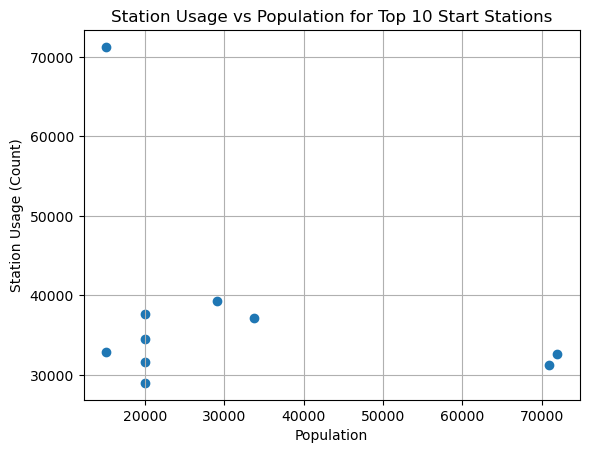

In [53]:
# Load data from JSON file
file_path = 'Top10StartStationsCopy.json'  # Update with the correct file path
df = pd.read_json(file_path)

# Calculate correlation coefficient
correlation = df['count'].corr(df['population'])
print(f"Correlation coefficient between station usage and population for Top10StationsCopy: {correlation}")

# Scatter plot of station usage vs. population
plt.scatter(df['population'], df['count'])
plt.title('Station Usage vs Population for Top 10 Start Stations')
plt.xlabel('Population')
plt.ylabel('Station Usage (Count)')
plt.grid(True)
plt.show()

The weak negative correlation coefficient suggests no relationship between population size and bike usage for the Top 10 Starting Stations. We can verify from the map on the html page (and in the .json and db2 database) that 4 of the Top 10 Start Stations are in the same zip code, leading them to having the same population. 

Correlation coefficient between station usage and population for Top10EndStationsCopy: -0.08405159671251905


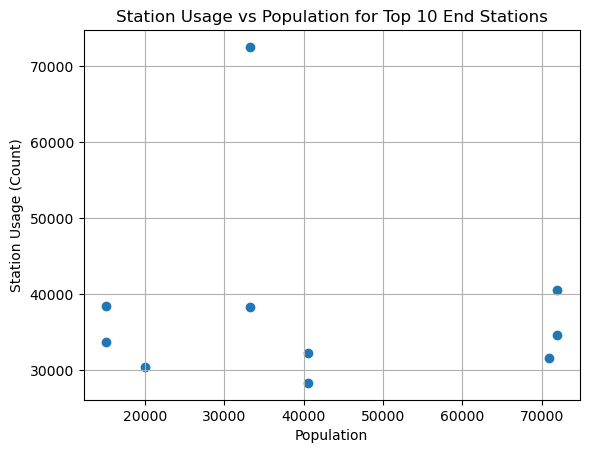

In [54]:
# Load data from JSON file
file_path2 = 'Top10EndStationsCopy.json'  # Update with the correct file path
df2 = pd.read_json(file_path2)

# Calculate correlation coefficient
correlation2 = df2['count'].corr(df2['population'])
print(f"Correlation coefficient between station usage and population for Top10EndStationsCopy: {correlation2}")

# Scatter plot of station usage vs. population
plt.scatter(df2['population'], df2['count'])
plt.title('Station Usage vs Population for Top 10 End Stations')
plt.xlabel('Population')
plt.ylabel('Station Usage (Count)')
plt.grid(True)
plt.show()

We can see that 